In [13]:
def toric_code(n, p):
    rows, cols = (n, n)
    A = []
    for i in range(rows):
        col = []
        for j in range(cols):
            col.append('I')
        A.append(col)
    #print(A)

    B = []
    for i in range(rows):
        col = []
        for j in range(cols):
            col.append('I')
        B.append(col)
    #print(B)

    pX = p

    rows, cols = (n, n)
    import random
    for i in range(rows):
        for j in range(cols):
            ran = random.uniform(0, 1)
            if(ran < pX):
                A[i][j] = 'X'
    #print(A)

    import random
    for i in range(rows):
        for j in range(cols):
            ran = random.uniform(0, 1)
            if(ran < pX):
                B[i][j] = 'X'
    #print(B)

    sign_matrix = []
    for i in range(rows):
        col = []
        for j in range(cols):
            col.append(1)
        sign_matrix.append(col)
    #print(sign_matrix)

    for i in range(rows):
        for j in range(cols):
            if A[i][j] == 'X':
                sign_matrix[i][j] = (-1) * sign_matrix[i][j]
            if B[i][j] == 'X':
                sign_matrix[i][j] = (-1) * sign_matrix[i][j]
            if A[i][(j + 1) % cols] == 'X':
                sign_matrix[i][j] = (-1) * sign_matrix[i][j]
            if B[(i + 1) % rows][j] == 'X':
                sign_matrix[i][j] = (-1) * sign_matrix[i][j]
    #print(sign_matrix)

    import networkx as nx
    G = nx.Graph()
    k = 0
    for i in range(rows):
        for j in range(cols):
            if (sign_matrix[i][j] == -1):
                k = k + 1
                G.add_node(k, coordinates = (i, j))
    #print(G)
    #print(G.nodes[1]['coordinates'])
    #print(G.nodes[2]['coordinates'])
    #print(G.nodes[3]['coordinates'])
    #print(G.nodes[4]['coordinates'])

    for x in range(k):
        for y in range(k):
            if x < y:
                l1 = G.nodes[x + 1]['coordinates']
                l2 = G.nodes[y + 1]['coordinates']
                xdist = abs(l1[0] - l2[0])
                ydist = abs(l1[1] - l2[1])
                dist1 = xdist + ydist
                dist2 = abs(n - xdist) + abs(ydist)
                dist3 = abs(xdist) + abs(n - ydist)
                dist4 = abs(n - xdist) + abs(n - ydist)
                #print(x, y, final_dist)
                final_dist = min(dist1, dist2, dist3, dist4)
                if(final_dist == dist1):
                    flag = 1
                elif (final_dist == dist2):
                    flag = 2
                elif (final_dist == dist3):
                    flag = 3
                else:
                    flag = 4
                G.add_edge(x + 1, y + 1, weight = (-1) * final_dist, direction = flag)
    #print(G)

    matching = nx.algorithms.matching.max_weight_matching(G, maxcardinality = True, weight = 'weight')
    matching = list(matching)
    #print(matching)
    #print(G.nodes[1])
    #print(G.nodes[2])
    #print(G.nodes[3])
    #print(G.nodes[4])
    #G.edges[(1, 4)]

    matching = nx.algorithms.matching.max_weight_matching(G, maxcardinality = True, weight = 'weight') # Minimum weight perfect matching
    matching = list(matching) # Matching converted to list
    CC = []

    for edge in matching:
        nodeM = edge[0] # One node of an edge
        nodeN = edge[1] # Another node of an edge
        coordM = G.nodes[nodeM]['coordinates'] # Coordinates of node M
        coordN = G.nodes[nodeN]['coordinates'] # Coordinates of node N

        if (coordM[1] > coordN[1]): # If node M is to the left of node N
            coordM, coordN = coordN, coordM # Swap nodes M and N

        direction = G.edges[edge]['direction'] # Orientation of edge, depending on which we will find the correction path C
        #print(direction)

        if (direction == 1):
            C = []
            # Correction edges around node M
            if (A[coordM[0]][coordM[1]] == 'I'):
                C.append(('A', coordM[0], coordM[1]))
            if (B[coordM[0]][coordM[1]] == 'I'): 
                C.append(('B', coordM[0], coordM[1]))
            if (A[coordM[0]][(coordM[1] + 1) % n] == 'I'): 
                C.append(('A', coordM[0], (coordM[1] + 1) % n))
            if (B[(coordM[0] + 1) % n][coordM[1]] == 'I'): 
                C.append(('B', (coordM[0] + 1) % n, coordM[1]))

            # Building the correction path
            if(abs(coordM[1] - coordN[1]) != 1):
                for i in range(coordM[1] + 1, coordN[1] - 1):
                    C.append(('B', coordM[0], i))
            if(coordM[0] < coordN[0]):
                for j in range(coordM[0] + 1, coordN[0] - 1):
                    C.append(('A', j, coordN[1]))
            if(coordM[0] > coordN[0]):
                for j in range(coordM[0] - 1, coordN[0] + 1, -1):
                    C.append(('A', j, coordN[1]))

            # Correction edges around node N
            if (A[coordN[0]][coordN[1]] == 'I'): 
                C.append(('A', coordN[0], coordN[1]))
            if (B[coordN[0]][coordN[1]] == 'I'): 
                C.append(('B', coordN[0], coordN[1]))
            if (A[coordN[0]][(coordN[1] + 1) % n] == 'I'): 
                C.append(('A', coordN[0], (coordN[1] + 1) % n))
            if (B[(coordN[0] + 1) % n][coordN[1]] == 'I'): 
                C.append(('B', (coordN[0] + 1) % n, coordN[1]))
            #print(C)
            C = list(set(C))
            #print(C)

        if (direction == 2):
            C = []
            # Correction edges around node M
            if (A[coordM[0]][coordM[1]] == 'I'):
                C.append(('A', coordM[0], coordM[1]))
            if (B[coordM[0]][coordM[1]] == 'I'): 
                C.append(('B', coordM[0], coordM[1]))
            if (A[coordM[0]][(coordM[1] + 1) % n] == 'I'): 
                C.append(('A', coordM[0], (coordM[1] + 1) % n))
            if (B[(coordM[0] + 1) % n][coordM[1]] == 'I'): 
                C.append(('B', (coordM[0] + 1) % n, coordM[1]))
            #print(C)

            #Building the correction path
            if(abs(coordM[0] - coordN[0]) != 1 and abs(coordM[0] - coordN[0]) != (n - 1)):
                if (coordM[0] > coordN[0]):
                    for j in range((coordM[0] + 1) % n, n - 1, +1):
                        C.append(('A', j, coordM[1]))
                    for j in range((0, (coordN[0] - 1) % n, +1)):
                        C.append(('A', j, coordM[1]))
                elif (coordM[0] < coordN[0]):
                    for j in range((coordM[0] - 1) % n, 0, -1):
                        C.append(('A', j, coordM[1]))
                    for j in range((n, (coordN[0] + 1) % n, -1)):
                        C.append(('A', j % n, coordM[1]))
            if(coordM[1] < coordN[1]):
                for i in range(coordM[1], coordN[1] - 1):
                    C.append(('B', coordN[0], i))
            #print(C)

            # Correction edges around node N
            if (A[coordN[0]][coordN[1]] == 'I'): 
                C.append(('A', coordN[0], coordN[1]))
            if (B[coordN[0]][coordN[1]] == 'I'): 
                C.append(('B', coordN[0], coordN[1]))
            if (A[coordN[0]][(coordN[1] + 1) % n] == 'I'): 
                C.append(('A', coordN[0], (coordN[1] + 1) % n))
            if (B[(coordN[0] + 1) % n][coordN[1]] == 'I'): 
                C.append(('B', (coordN[0] + 1) % n, coordN[1]))
            C = list(set(C))
            #print(C)

        if (direction == 3):
            C = []
            # Correction edges around node M
            if (A[coordM[0]][coordM[1]] == 'I'):
                C.append(('A', coordM[0], coordM[1]))
            if (B[coordM[0]][coordM[1]] == 'I'):
                C.append(('B', coordM[0], coordM[1]))
            if (A[coordM[0]][(coordM[1] + 1) % n] == 'I'): 
                C.append(('A', coordM[0], (coordM[1] + 1) % n))
            if (B[(coordM[0] + 1) % n][coordM[1]] == 'I'): 
                C.append(('B', (coordM[0] + 1) % n, coordM[1]))
            #print(C)

            #Building the correction path
            if(abs(coordM[1] - coordN[1]) != 1 and abs(coordM[1] - coordN[1]) != (n-1)):
                if (coordM[1] < coordN[1]):
                    for i in range((coordM[1] - 1) % n, 0, -1):
                        C.append(('B', coordM[0], i))
                    for i in range((n, (coordN[1] + 1) % n, -1)):
                        C.append(('B', coordM[0], i % n))
            if(coordM[0] < coordN[0]):
                for j in range(coordM[0], coordN[0] - 1):
                    C.append(('A', j, coordN[1]))
            if(coordM[0] > coordN[0]):
                for j in range(coordM[0] - 1, coordN[0] + 1, -1):
                    C.append(('A', j, coordN[1]))
            #print(C)

            # Correction edges around node N
            if (A[coordN[0]][coordN[1]] == 'I'): 
                C.append(('A', coordN[0], coordN[1]))
            if (B[coordN[0]][coordN[1]] == 'I'): 
                C.append(('B', coordN[0], coordN[1]))
            if (A[coordN[0]][(coordN[1] + 1) % n] == 'I'): 
                C.append(('A', coordN[0], (coordN[1] + 1) % n))
            if (B[(coordN[0] + 1) % n][coordN[1]] == 'I'): 
                C.append(('B', (coordN[0] + 1) % n, coordN[1]))
            #print(C)
            C = list(set(C))
            #print(C)

        if (direction == 4):
            C = []
            # Corrections edges around M
            if (A[coordM[0]][coordM[1]] == 'I'):
                C.append(('A', coordM[0], coordM[1]))
            if (B[coordM[0]][coordM[1]] == 'I'):
                C.append(('B', coordM[0], coordM[1]))
            if (A[coordM[0]][(coordM[1] + 1) % n] == 'I'): 
                C.append(('A', coordM[0], (coordM[1] + 1) % n))
            if (B[(coordM[0] + 1) % n][coordM[1]] == 'I'): 
                C.append(('B', (coordM[0] + 1) % n, coordM[1]))
            #print(C)        

            #Building the correction path
            if(abs(coordM[1] - coordN[1]) != 1 and abs(coordM[1] - coordN[1]) != (n-1)):
                if (coordM[1] < coordN[1]):
                    for i in range((coordM[1] - 1) % n, 0, -1):
                        C.append(('B', coordM[0], i))
                    for i in range((n, (coordN[1] + 1) % n, -1)):
                        C.append(('B', coordM[0], i % n))
            if(coordM[0] < coordN[0]):
                for j in range(coordM[0] - 1, 0, -1):
                    C.append(('A', j, coordN[1] + 1))
                for j in range(n, coordN[0] + 1, -1):
                    C.append(('A', j, coordN[1] + 1))
            if(coordM[0] > coordN[0]):
                for j in range(coordM[0], n, +1):
                    C.append(('A', j % n, coordN[1] + 1))
                for j in range(0, coordN[0] - 1, +1):
                    C.append(('A', j % n, coordN[1] + 1))
            #print(C)

            # Correction edges around node N
            if (A[coordN[0]][coordN[1]] == 'I'): 
                C.append(('A', coordN[0], coordN[1]))
            if (B[coordN[0]][coordN[1]] == 'I'): 
                C.append(('B', coordN[0], coordN[1]))
            if (A[coordN[0]][(coordN[1] + 1) % n] == 'I'): 
                C.append(('A', coordN[0], (coordN[1] + 1) % n))
            if (B[(coordN[0] + 1) % n][coordN[1]] == 'I'): 
                C.append(('B', (coordN[0] + 1) % n, coordN[1]))
            #print(C)
            C = list(set(C))
            #print(C)
        CC = CC + C
    #print(CC)
    CC = list(set(CC))
    #print(CC)

    # Intersections of Logical X (at position n-1) with correction vector CC
    CC_X = 0
    for i in CC:
        if (i[0] == 'A' and i[1] == n - 1):
            CC_X = CC_X + 1
    #print(CC_X)

    # Intersections of Logical Y (at position n-1) with correction vector CC
    CC_Y = 0
    for j in CC:
        if (j[0] == 'B' and j[1] == n - 1):
            CC_Y = CC_Y + 1
    #print(CC_Y)

    # Intersections of error matrix A with logical X (at position n-1)
    [['X', 'I', 'I'], ['I', 'I', 'I'], ['I', 'I', 'I']]
    A_X = 0
    for i in range(0, n-1):
        if (A[n-1][i] == 'X'): A_X = A_X + 1
    #print(A_X)

    # Intersections of error matrix B with logical Y (at position n-1)
    B_Y = 0
    for j in range(0, n-1):
        if (B[j][n-1] == 'X'): B_Y = B_Y + 1
    #print(B_Y)

    if((CC_X + A_X) % 2 == 0 and (CC_Y + B_Y) % 2 == 0):
        #print("No logical error!")
        return 1
    else:
        #print("Logical error!")
        return 0

In [42]:
import matplotlib.pyplot as plt
error_rate_array = []
for P in range(1, 100, 1):
    count_0 = 0
    count_1 = 0
    for x in range(0, 100):
        n = 3
        p = P/100
        val = toric_code(n, p)
        if (val == 0):
            count_0 = count_0 + 1
        elif (val == 1):
            count_1 = count_1 + 1
    logical_error_rate = (count_0)/(count_0 + count_1)
    error_rate_array = error_rate_array + [logical_error_rate]
    print(logical_error_rate)
print(error_rate_array)

0.1
0.08
0.19
0.27
0.34
0.31
0.38
0.4
0.44
0.41
0.53
0.51
0.48
0.59
0.53
0.64
0.62
0.68
0.66
0.69
0.67
0.7
0.68
0.75
0.72
0.71
0.72
0.73
0.75
0.75
0.76
0.67
0.73
0.75
0.78
0.79
0.72
0.73
0.72
0.79
0.76
0.78
0.76
0.77
0.69
0.79
0.73
0.67
0.76
0.7
0.69
0.7
0.7
0.74
0.68
0.67
0.6
0.66
0.52
0.66
0.64
0.71
0.64
0.68
0.6
0.73
0.68
0.75
0.64
0.65
0.67
0.57
0.68
0.55
0.61
0.6
0.62
0.54
0.55
0.58
0.52
0.45
0.53
0.59
0.49
0.38
0.41
0.49
0.47
0.48
0.3
0.43
0.28
0.32
0.29
0.19
0.18
0.13
0.05
[0.1, 0.08, 0.19, 0.27, 0.34, 0.31, 0.38, 0.4, 0.44, 0.41, 0.53, 0.51, 0.48, 0.59, 0.53, 0.64, 0.62, 0.68, 0.66, 0.69, 0.67, 0.7, 0.68, 0.75, 0.72, 0.71, 0.72, 0.73, 0.75, 0.75, 0.76, 0.67, 0.73, 0.75, 0.78, 0.79, 0.72, 0.73, 0.72, 0.79, 0.76, 0.78, 0.76, 0.77, 0.69, 0.79, 0.73, 0.67, 0.76, 0.7, 0.69, 0.7, 0.7, 0.74, 0.68, 0.67, 0.6, 0.66, 0.52, 0.66, 0.64, 0.71, 0.64, 0.68, 0.6, 0.73, 0.68, 0.75, 0.64, 0.65, 0.67, 0.57, 0.68, 0.55, 0.61, 0.6, 0.62, 0.54, 0.55, 0.58, 0.52, 0.45, 0.53, 0.59, 0.49, 0.38, 0.41, 0

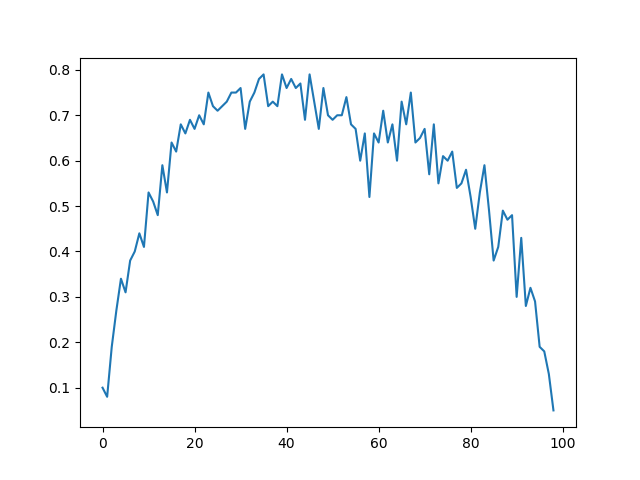

In [43]:
import matplotlib.pyplot as plt
plt.plot(error_rate_array)
plt.show()